# Objective: Make widget for logistic function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Rectangle
from ipywidgets import interactive, Button
from sklearn import datasets
from slm import viz

In [2]:
data = datasets.load_iris()

In [4]:
def logistic(x: float) -> float:
    '''Take linear, return logistic.'''
    return np.exp(x) / (1 + np.exp(x))

def logreg_predict(x, coeff, intercept):
    return logistic(np.dot(x, coeff.T).squeeze() + intercept)

# 2d interact

In [3]:
dataX = data.data[:,:1]
dataY = (data.target > 0).astype(int)
print("n_observations (n): {}".format(dataX.shape[0]))
print("n_predictors (p): {}".format(dataX.shape[1]))
print("n_class (k): {}".format(len(np.unique(dataY))))

n_observations (n): 150
n_predictors (p): 1
n_class (k): 2


interactive(children=(FloatSlider(value=-15.0, description='beta0', max=40.0, min=-40.0), FloatSlider(value=3.…

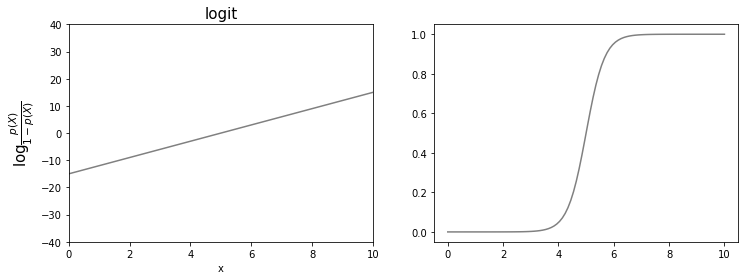

In [8]:
def plot_logistic(beta0=-15, beta1=3):

    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    X = np.linspace(0, 10, 100)
    Y = beta0 + beta1*X
    ax[0].plot(X, Y, c='grey')
    ax[0].set_xlim(0,10)
    ax[0].set_ylim(-40,40)
    ax[0].set_xlabel('x')
    ax[0].set_title('logit', fontsize=15)
    ax[0].set_ylabel(r'$\log\frac{p(X)}{1-p(X)}$', fontsize=15)
    ax[1].plot(X, logistic(Y), c='grey')
    precision = dataY==np.round(logistic(beta0+beta1*dataX).squeeze())
    cim = ax[1].scatter(dataX, dataY, s=80, marker='o',\
                        c=precision, \
                        cmap=cm.get_cmap('seismic_r', 2))
    cim.set_facecolor('none')
    ax[1].set_xlim(3,9)
    ax[1].set_ylim(-0.5,1.5)
    ax[1].set_yticks([0,1])
    ax[1].set_xlabel('x', fontsize=15)
    ax[1].set_ylabel('p(x)', fontsize=15)
    ax[1].set_title('logistic model', fontsize=15)
    ax[1].text(3.2,1.3, 'Error rate: {:.3}'.format(
        1-len(precision.nonzero()[0])/len(precision)), fontsize=15)
    cax = plt.colorbar(cim)
    cax.set_ticks([0.25, 0.75])
    cax.ax.set_yticklabels(['incorrect', 'correct'])
    plt.show()

    return X, Y

w = interactive(plot_logistic, beta0=(-40., 40.), beta1=(-10.,10.))
display(w)

# 3d interact

In [6]:
dataX = data.data[:,:2]
dataY = (data.target > 0).astype(int)
print("n_observations (n): {}".format(dataX.shape[0]))
print("n_predictors (p): {}".format(dataX.shape[1]))
print("n_class (k): {}".format(len(np.unique(dataY))))

n_observations (n): 150
n_predictors (p): 2
n_class (k): 2


interactive(children=(FloatSlider(value=-1.0, description='beta0', max=40.0, min=-40.0), FloatSlider(value=3.0…

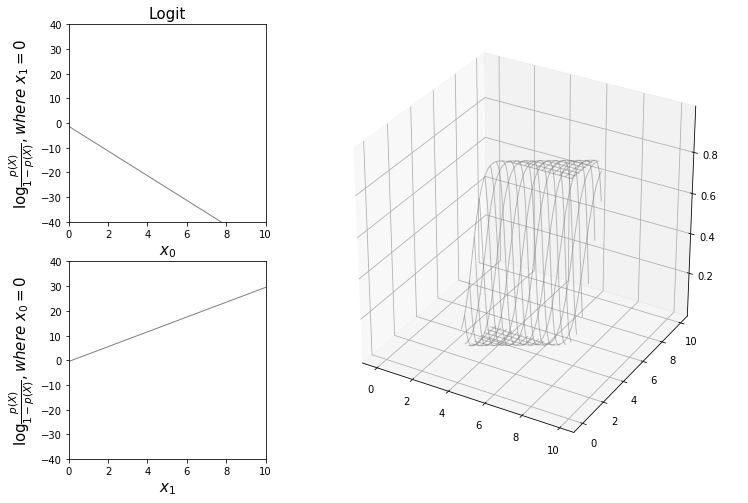

In [7]:
def plot_logistic_2d(beta0=-1, beta1=3, beta2=-5, elev=16, azim=-123):
    X = np.vstack((np.linspace(0, 10, 100), np.linspace(0, 10, 100))).T
    X_mesh = viz.make_mesh(X, 0.1)
    Y = np.dot(X_mesh, np.array([beta1, beta2]).T).squeeze() + beta0
    
    fig = plt.figure(figsize=(12,8))
    
    ax = fig.add_subplot(2,3,1)
    ax.plot(X_mesh[:,1,1], Y[:,0], lw=1, c='grey')
    ax.set_title('Logit', fontsize=15)
    ax.set_xlabel('$x_0$', fontsize=15)
    ax.set_xlim(0,10)
    ax.set_ylim(-40,40)
    ax.set_ylabel(r'$\log\frac{p(X)}{1-p(X)}, where\ x_1=0$', fontsize=15)
    
    ax = fig.add_subplot(2,3,4)
    ax.plot(X_mesh[0,:,0], Y[0,:], lw=1, c='grey')
    ax.set_xlim(0,10)
    ax.set_ylim(-40,40)
    ax.set_xlabel('$x_1$', fontsize=15)
    ax.set_ylabel(r'$\log\frac{p(X)}{1-p(X)}, where\ x_0=0$', fontsize=15)
    
    ax = fig.add_subplot(1,3,(2,3), projection='3d')
    logy = logistic(Y)
    logy[X_mesh[...,0]<3] = np.nan
    logy[X_mesh[...,0]>9] = np.nan
    logy[X_mesh[...,1]<2] = np.nan
    logy[X_mesh[...,1]>5] = np.nan
    ax.plot_wireframe(X_mesh[...,0], X_mesh[...,1], 
                         logy, 
                         color="grey", alpha=0.5, lw=1, rcount=40, ccount=40)
    precision = dataY==np.round(logreg_predict(dataX, np.array([beta1, beta2]), beta0).squeeze())
    cim = ax.scatter(dataX[:,0], dataX[:,1], dataY, s=20, marker='o',\
                        c=precision, \
                        cmap=cm.get_cmap('seismic_r', 2))
    cim.set_facecolor('none')
    ax.set_xlim(3,9)
    ax.set_ylim(2,5)
    ax.set_zlim(0,1)
    cax = plt.colorbar(cim)
    cax.set_ticks([0.25, 0.75])
    cax.ax.set_yticklabels(['incorrect', 'correct'])
    ax.view_init(elev, azim)
    ax.set_title('Logisitc model\nError rate: {:.3}'.format(
        1-len(precision.nonzero()[0])/len(precision)), fontsize=15)
    ax.grid(False)
    ax.set_xlabel('$x_0$', fontsize=15)
    ax.set_ylabel('$x_1$', fontsize=15)
    ax.set_zlabel('p(x)', fontsize=15)
    plt.show()

    return X, Y

w = interactive(plot_logistic_2d, beta0=(-40., 40.), beta1=(-10.,10.), beta2=(-10.,10.),
                elev=(-180,180, 22.5), azim=(-180,180, 22.5))

display(w)